In [26]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
vader = pd.read_csv('../output/vader.csv')
topic = pd.read_csv('../output/topic.csv')

In [28]:
vader.head()

,Unnamed: 0,app_id,review_id,review_score,vader_neg,vader_neu,vader_pos,vader_compound
0,0,com.midasplayer.apps.candycrushsaga,5273394649,5,0.069,0.495,0.436,0.9205
1,1,com.midasplayer.apps.candycrushsaga,5273271525,5,0.038,0.427,0.535,0.9682
2,2,com.midasplayer.apps.candycrushsaga,5272658314,5,0.033,0.746,0.221,0.8070
3,3,com.midasplayer.apps.candycrushsaga,5272631493,5,0.000,0.494,0.506,0.9545
4,4,com.midasplayer.apps.candycrushsaga,5272620906,1,0.184,0.725,0.091,-0.8887


In [29]:
topic.head()

,Unnamed: 0,Document_No,Dominant_Topic,Topic_Perc_Contrib,Topic_Keywords,review_id,appid
0,0,0,5.0,0.5421,"game, love, !, great, best, fun, time, ever, candy, Great",5273394649,com.midasplayer.apps.candycrushsaga
1,1,1,2.0,0.8819,"crush, candy, game, level, update, Candy, facebook, love, play, fix",5273271525,com.midasplayer.apps.candycrushsaga
2,2,2,9.0,0.7897,"game, fun, ad, get, play, good, level, like, would, !",5272658314,com.midasplayer.apps.candycrushsaga
3,3,3,9.0,0.8351,"game, fun, ad, get, play, good, level, like, would, !",5272631493,com.midasplayer.apps.candycrushsaga
4,4,4,8.0,0.6482,"game, level, booster, get, playing, year, time, move, candy, play",5272620906,com.midasplayer.apps.candycrushsaga


In [30]:
combined = vader.join(topic[['Dominant_Topic', 'Topic_Perc_Contrib', 'Topic_Keywords']])

In [31]:
combined.head()

,Unnamed: 0,app_id,review_id,review_score,vader_neg,vader_neu,vader_pos,vader_compound,Dominant_Topic,Topic_Perc_Contrib,Topic_Keywords
0,0,com.midasplayer.apps.candycrushsaga,5273394649,5,0.069,0.495,0.436,0.9205,5.0,0.5421,"game, love, !, great, best, fun, time, ever, candy, Great"
1,1,com.midasplayer.apps.candycrushsaga,5273271525,5,0.038,0.427,0.535,0.9682,2.0,0.8819,"crush, candy, game, level, update, Candy, facebook, love, play, fix"
2,2,com.midasplayer.apps.candycrushsaga,5272658314,5,0.033,0.746,0.221,0.8070,9.0,0.7897,"game, fun, ad, get, play, good, level, like, would, !"
3,3,com.midasplayer.apps.candycrushsaga,5272631493,5,0.000,0.494,0.506,0.9545,9.0,0.8351,"game, fun, ad, get, play, good, level, like, would, !"
4,4,com.midasplayer.apps.candycrushsaga,5272620906,1,0.184,0.725,0.091,-0.8887,8.0,0.6482,"game, level, booster, get, playing, year, time, move, candy, play"


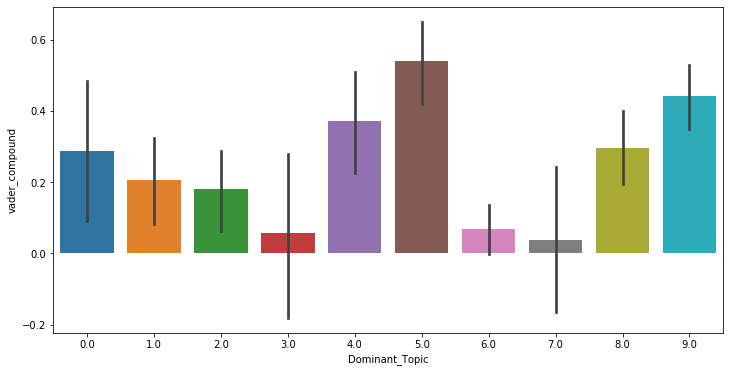

In [32]:
plt.rcParams["figure.figsize"] = (12,6)
sns.barplot(x='Dominant_Topic', y='vader_compound',data=combined)

In [33]:
topics = combined[['Dominant_Topic', 'Topic_Keywords']].drop_duplicates().sort_values('Dominant_Topic')

In [34]:
pd.set_option('display.max_colwidth', -1)
topics.style.hide_index()

Dominant_Topic,Topic_Keywords
0,"sound, game, awesome, bug, Awesome, love, em, level, play, harder"
1,"level, life, game, reset, update, without, board, back, losing, exit"
2,"crush, candy, game, level, update, Candy, facebook, love, play, fix"
3,"game, app, ever, change, see, level, thanks, income, horrible, something"
4,"!, like, game, sword, get, many, add, level, ore, think"
5,"game, love, !, great, best, fun, time, ever, candy, Great"
6,"ad, game, level, many, middle, update, playing, every, play, add"
7,"money, add, get, ?, game, way, update, need, level, Adds"
8,"game, level, booster, get, playing, year, time, move, candy, play"
9,"game, fun, ad, get, play, good, level, like, would, !"


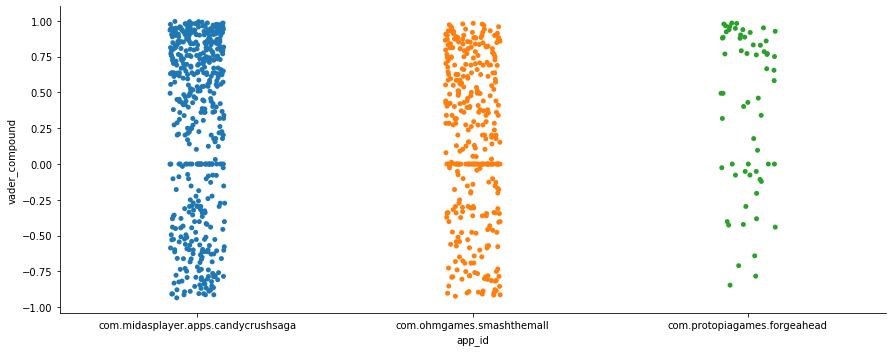

In [38]:
sns.catplot(x='app_id', y='vader_compound',data=combined , aspect =2.5);


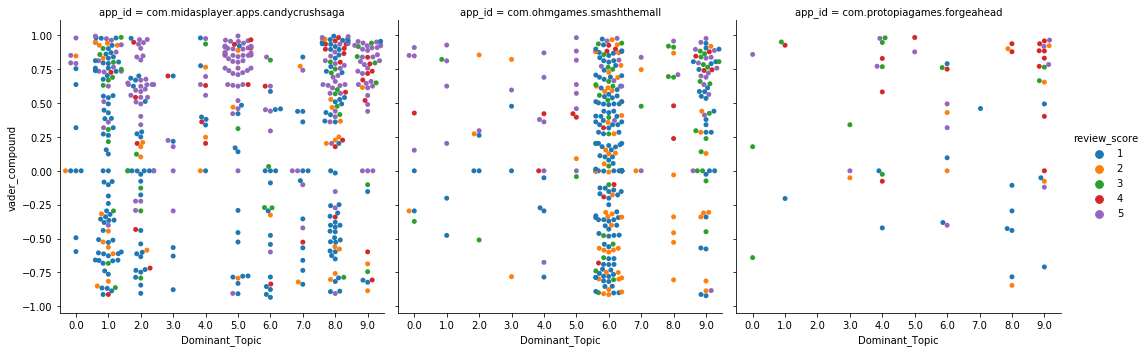

In [40]:
sns.catplot(x='Dominant_Topic', y='vader_compound', hue="review_score",
            col="app_id", aspect=1,
            kind="swarm", data=combined);

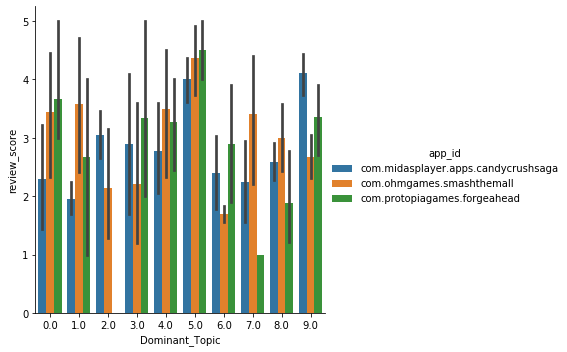

In [41]:
sns.catplot(x='Dominant_Topic', y='review_score',data=combined, hue="app_id", kind="bar");
